In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

**run this**

In [91]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [92]:
# Read the CSV file 'creditcard.csv' into a Pandas DataFrame named df
df = pd.read_csv('/kaggle/input/frauddetection/transactions_train.csv')

In [93]:
# Display the first few rows of the DataFrame df
df.head()

step      type   amount     nameOrig  oldbalanceOrig  newbalanceOrig  \
0     1   PAYMENT  9839.64  C1231006815       170136.00       160296.36   
1     1   PAYMENT  1864.28  C1666544295        21249.00        19384.72   
2     1  TRANSFER   181.00  C1305486145          181.00            0.00   
3     1  CASH_OUT   181.00   C840083671          181.00            0.00   
4     1   PAYMENT 11668.14  C2048537720        41554.00        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  
0  M1979787155            0.00            0.00        0  
1  M2044282225            0.00            0.00        0  
2   C553264065            0.00            0.00        1  
3    C38997010        21182.00            0.00        1  
4  M1230701703            0.00            0.00        0

In [4]:
# Display a concise summary of the DataFrame df, including column names, non-null counts...
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6351193 entries, 0 to 6351192
Data columns (total 10 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrig  float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 484.6+ MB


In [13]:
df.columns.values

array(['step', 'type', 'amount', 'oldbalanceOrig', 'newbalanceOrig',
       'oldbalanceDest', 'newbalanceDest', 'isFraud'], dtype=object)

In [14]:
df.shape

(6351193, 8)

In [15]:
df['isFraud'].value_counts()

isFraud
0    6343476
1       7717
Name: count, dtype: int64

In [16]:
df.isnull().sum()

step              0
type              0
amount            0
oldbalanceOrig    0
newbalanceOrig    0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64

no missing values in these columns

In [12]:
df = df.drop(columns=['nameOrig'])

KeyError: "['nameOrig'] not found in axis"

In [ ]:
df = df.drop(columns=['nameDest'])

In [17]:
df.head()

step      type    amount  oldbalanceOrig  newbalanceOrig  oldbalanceDest  \
0     1   PAYMENT   9839.64        170136.0       160296.36             0.0   
1     1   PAYMENT   1864.28         21249.0        19384.72             0.0   
2     1  TRANSFER    181.00           181.0            0.00             0.0   
3     1  CASH_OUT    181.00           181.0            0.00         21182.0   
4     1   PAYMENT  11668.14         41554.0        29885.86             0.0   

   newbalanceDest  isFraud  
0             0.0        0  
1             0.0        0  
2             0.0        1  
3             0.0        1  
4             0.0        0

In [18]:
# Initialize the LabelEncoder
label_encoder = LabelEncoder()
# Apply label encoding to the 'Category' column
df['type_Encoded'] = label_encoder.fit_transform(df['type'])

In [19]:
df.head()

step      type    amount  oldbalanceOrig  newbalanceOrig  oldbalanceDest  \
0     1   PAYMENT   9839.64        170136.0       160296.36             0.0   
1     1   PAYMENT   1864.28         21249.0        19384.72             0.0   
2     1  TRANSFER    181.00           181.0            0.00             0.0   
3     1  CASH_OUT    181.00           181.0            0.00         21182.0   
4     1   PAYMENT  11668.14         41554.0        29885.86             0.0   

   newbalanceDest  isFraud  type_Encoded  
0             0.0        0             3  
1             0.0        0             3  
2             0.0        1             4  
3             0.0        1             1  
4             0.0        0             3

In [20]:
df=df.drop(columns=['type'])

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6351193 entries, 0 to 6351192
Data columns (total 8 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   amount          float64
 2   oldbalanceOrig  float64
 3   newbalanceOrig  float64
 4   oldbalanceDest  float64
 5   newbalanceDest  float64
 6   isFraud         int64  
 7   type_Encoded    int64  
dtypes: float64(5), int64(3)
memory usage: 387.6 MB


# checking imbalances of data using skewing, variances, and kurtosis

In [22]:
skew =df.skew().sort_values(ascending =False )
skew_df= pd.DataFrame({'skew':skew})
skew_df.head(10)

skew
amount          31.050928
isFraud         28.635901
oldbalanceDest  19.934164
newbalanceDest  19.362310
oldbalanceOrig   5.243790
newbalanceOrig   5.172421
step             0.338249
type_Encoded     0.196481

In [23]:
skew_df[(skew_df['skew']>=1) |(skew_df['skew']<=-1) ].index

Index(['amount', 'isFraud', 'oldbalanceDest', 'newbalanceDest',
       'oldbalanceOrig', 'newbalanceOrig'],
      dtype='object')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


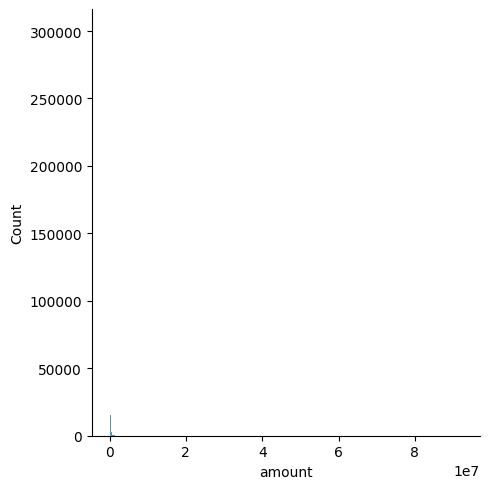

In [24]:
ax = sns.displot(df['amount'])

<Axes: >

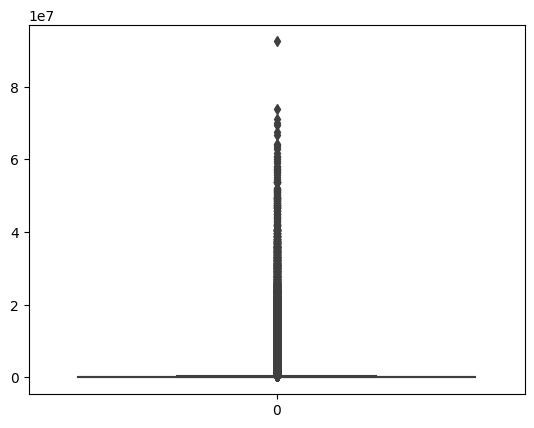

In [28]:
sns.boxplot(data=df['amount'], saturation=.3)

In [29]:
amount_corrected= np.log(df['amount' ]+1)
print(df['amount'].skew())
print(amount_corrected.skew())

31.050928455018084
-0.5549658313745639


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


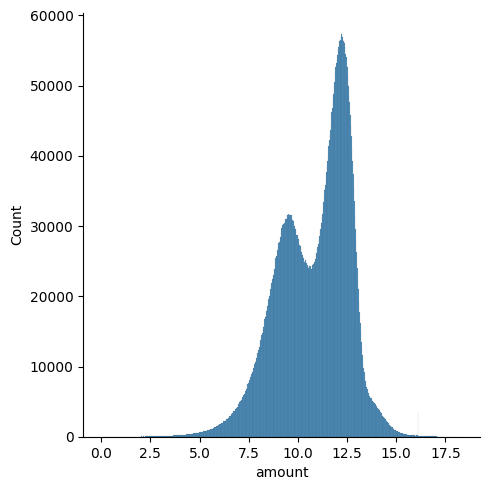

In [30]:
ax = sns.displot(amount_corrected)

In [31]:
kurtosis= pd.DataFrame(df.kurtosis(),columns=['Kurtosis'])
kurtosis.head(8)

Kurtosis
step               0.246047
amount          1803.410673
oldbalanceOrig    32.875430
newbalanceOrig    32.003795
oldbalanceDest   950.015902
newbalanceDest   863.076045
isFraud          818.015079
type_Encoded      -1.434632

In [32]:
kurtosis[(kurtosis['Kurtosis']>=3) |(kurtosis['Kurtosis']<=-3) ].index

Index(['amount', 'oldbalanceOrig', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest', 'isFraud'],
      dtype='object')

In [33]:
amount_corrected.kurtosis()

0.18257833330041695

In [34]:
var= df.var().sort_values(ascending =True )
var_df= pd.DataFrame({'var':var})
var_df.head(10)

var
isFraud         1.213571e-03
type_Encoded    1.822790e+00
step            1.990008e+04
amount          3.643704e+11
oldbalanceOrig  8.351864e+12
newbalanceOrig  8.561904e+12
oldbalanceDest  1.155268e+13
newbalanceDest  1.350043e+13

In [35]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

step                  179.00
amount             195326.90
oldbalanceOrig     107346.00
newbalanceOrig     144365.15
oldbalanceDest     943866.12
newbalanceDest    1112791.08
isFraud                 0.00
type_Encoded            2.00
dtype: float64


In [36]:
df_num=df.select_dtypes(exclude=['category']) 
df_out = df_num[~((df_num < (Q1 - 1.5 * IQR))|(df_num > (Q3 + 1.5 * IQR))).any(axis=1)]
print(df_out.shape)
del df_num 
del df_out 

(4320075, 8)


In [37]:
df.tail(5)

step      amount  oldbalanceOrig  newbalanceOrig  oldbalanceDest  \
6351188   699   162326.52       162326.52            0.00            0.00   
6351189   699   162326.52       162326.52            0.00            0.00   
6351190   699  2763398.31      2763398.31            0.00            0.00   
6351191   699  2763398.31      2763398.31            0.00       339515.35   
6351192   699      578.21        10575.00         9996.79       127072.23   

         newbalanceDest  isFraud  type_Encoded  
6351188            0.00        1             4  
6351189       162326.52        1             1  
6351190            0.00        1             4  
6351191      3102913.66        1             1  
6351192       127650.44        0             2

In [38]:
from imblearn.under_sampling import RandomUnderSampler

# Separate features (X) and target (y)
X = df.drop('isFraud', axis=1)
y = df['isFraud']

# Initialize RandomUnderSampler
rus = RandomUnderSampler(random_state=42)

# Fit and apply the resampler to the data
X_resampled, y_resampled = rus.fit_resample(X, y)

# Convert the resampled data back to a DataFrame
downsampled_df = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.DataFrame(y_resampled, columns=['isFraud'])], axis=1)

downsampled_df.head(10)

step     amount  oldbalanceOrig  newbalanceOrig  oldbalanceDest  \
4667940   330  150636.91        15272.00            0.00       248487.34   
1674301   158   16591.53         3261.88            0.00            0.00   
2497763   204  107013.71      2098845.07      2205858.79      1392390.22   
2673314   210  219026.92        69840.00       288866.92        43395.55   
4485138   324  209837.61          146.00       209983.61        80208.93   
3643669   275    2927.44        41384.00        38456.56            0.00   
5366695   375   23873.81        57036.00        33162.19            0.00   
869370     42   21688.62      6462241.67      6483930.29      3916093.41   
5253479   371  172501.82       848988.31      1021490.13       687741.99   
247923     14   10956.22        21460.00        10503.78      2796194.49   

         newbalanceDest  type_Encoded  isFraud  
4667940       399124.25             1        0  
1674301            0.00             3        0  
2497763      1285376.51             0        0  
2673314            0.00             0        0  
4485138            0.00             0        0  
3643669            0.00             3        0  
5366695            0.00             3        0  
869370       3894404.79             0        0  
5253479       515240.17             0        0  
247923       2684647.04             1        0

In [83]:
downsampled_df['isFraud'].value_counts()

isFraud
0    7717
1    7717
Name: count, dtype: int64

In [65]:
# Installation
!pip install lazypredict

In [66]:
from sklearn.model_selection import train_test_split
from lazypredict.Supervised import LazyClassifier

# Separate features and target
x = downsampled_df.drop(columns= 'isFraud')
y = downsampled_df['isFraud']

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


# Fit all models
clf = LazyClassifier(predictions=True)
models, predictions = clf.fit(x_train, x_test, y_train, y_test)
models

 97%|█████████▋| 28/29 [00:25<00:00,  1.30it/s]

[LightGBM] [Info] Number of positive: 6187, number of negative: 6160
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001479 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1536
[LightGBM] [Info] Number of data points in the train set: 12347, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.501093 -> initscore=0.004374
[LightGBM] [Info] Start training from score 0.004374


100%|██████████| 29/29 [00:25<00:00,  1.13it/s]


Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
LGBMClassifier                     0.99               0.99     0.99      0.99   
BaggingClassifier                  0.99               0.99     0.99      0.99   
XGBClassifier                      0.99               0.99     0.99      0.99   
RandomForestClassifier             0.99               0.99     0.99      0.99   
DecisionTreeClassifier             0.99               0.99     0.99      0.99   
ExtraTreesClassifier               0.99               0.99     0.99      0.99   
AdaBoostClassifier                 0.98               0.98     0.98      0.98   
ExtraTreeClassifier                0.97               0.97     0.97      0.97   
KNeighborsClassifier               0.94               0.94     0.94      0.94   
Perceptron                         0.92               0.92     0.92      0.92   
SVC                                0.91               0.91     0.91      0.91   
PassiveAggressiveClassifier        0.91               0.91     0.91      0.91   
LabelPropagation                   0.91               0.91     0.91      0.91   
LabelSpreading                     0.91               0.90     0.90      0.90   
SGDClassifier                      0.90               0.90     0.90      0.90   
LinearSVC                          0.90               0.90     0.90      0.90   
LogisticRegression                 0.89               0.89     0.89      0.89   
QuadraticDiscriminantAnalysis      0.87               0.87     0.87      0.87   
NuSVC                              0.86               0.86     0.86      0.86   
CalibratedClassifierCV             0.84               0.84     0.84      0.84   
GaussianNB                         0.78               0.78     0.78      0.78   
LinearDiscriminantAnalysis         0.75               0.75     0.75      0.75   
RidgeClassifier                    0.75               0.75     0.75      0.75   
RidgeClassifierCV                  0.74               0.74     0.74      0.74   
NearestCentroid                    0.72               0.72     0.72      0.72   
BernoulliNB                        0.69               0.69     0.69      0.68   
DummyClassifier                    0.50               0.50     0.50      0.33   

                               Time Taken  
Model                                      
LGBMClassifier                       0.25  
BaggingClassifier                    0.30  
XGBClassifier                        0.21  
RandomForestClassifier               1.17  
DecisionTreeClassifier               0.10  
ExtraTreesClassifier                 0.74  
AdaBoostClassifier                   0.56  
ExtraTreeClassifier                  0.02  
KNeighborsClassifier                 0.24  
Perceptron                           0.04  
SVC                                  2.90  
PassiveAggressiveClassifier          0.04  
LabelPropagation                     3.68  
LabelSpreading                       5.36  
SGDClassifier                        0.07  
LinearSVC                            0.56  
LogisticRegression                   0.11  
QuadraticDiscriminantAnalysis        0.04  
NuSVC                                6.81  
CalibratedClassifierCV               2.10  
GaussianNB                           0.02  
LinearDiscriminantAnalysis           0.07  
RidgeClassifier                      0.04  
RidgeClassifierCV                    0.06  
NearestCentroid                      0.03  
BernoulliNB                          0.02  
DummyClassifier                      0.02

# picking up KNeighboursClassifier, LabelPropagation, and LabelSpreading as my models and applying gridsearchcv

In [68]:
from sklearn.semi_supervised import LabelSpreading
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Separate features (X) and target (y)
X = downsampled_df.drop('isFraud', axis=1)
y = downsampled_df['isFraud']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the LabelSpreading model
model = LabelSpreading()

# Define the parameter grid to search
param_grid = {
    'kernel': ['knn', 'rbf'],  # Kernel function to use
    'gamma': ['scale', 'auto', 0.1, 1.0],  # Kernel coefficient for 'rbf' and 'poly' kernels
    'alpha': [0.1, 0.2, 0.5, 0.8],  # Clamping factor
    'n_neighbors': [3, 5, 7]  # Number of neighbors to consider
}

# Initialize GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)

# Perform grid search on the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Hyperparameters: {best_params}")
print(f"Best Cross-validation Accuracy: {best_score:.2f}")

Fitting 5 folds for each of 96 candidates, totalling 480 fits
Best Hyperparameters: {'alpha': 0.1, 'gamma': 0.1, 'kernel': 'knn', 'n_neighbors': 3}
Best Cross-validation Accuracy: 0.96


In [69]:
# Initialize the LabelSpreading model with the best parameters
best_model = LabelSpreading(kernel=best_params['kernel'],
                            gamma=best_params['gamma'],
                            alpha=best_params['alpha'],
                            n_neighbors=best_params['n_neighbors'])

# Fit the model to the training data
best_model.fit(X_train, y_train)

# Predict the labels for the test data
y_pred = best_model.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.95      0.96      1557
           1       0.95      0.96      0.96      1530

    accuracy                           0.96      3087
   macro avg       0.96      0.96      0.96      3087
weighted avg       0.96      0.96      0.96      3087



accuracy score improved

In [71]:
from sklearn.semi_supervised import LabelSpreading, LabelPropagation
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Separate features (X) and target (y)
X = downsampled_df.drop('isFraud', axis=1)
y = downsampled_df['isFraud']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the LabelSpreading model
model = LabelPropagation()

# Define the parameter grid to search
param_grid = {
    'kernel': ['knn', 'rbf'],  # Kernel function to use
    'gamma': ['scale', 'auto', 0.1, 1.0],  # Kernel coefficient for 'rbf' and 'poly' kernels
    'max_iter': [30, 100, 500],  
    'n_neighbors': [3, 5, 7]  # Number of neighbors to consider
}

# Initialize GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)

# Perform grid search on the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Hyperparameters: {best_params}")
print(f"Best Cross-validation Accuracy: {best_score:.2f}")

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Hyperparameters: {'gamma': 0.1, 'kernel': 'knn', 'max_iter': 30, 'n_neighbors': 3}
Best Cross-validation Accuracy: 0.96


In [72]:
# Initialize the LabelSpreading model with the best parameters
best_model = LabelPropagation(kernel=best_params['kernel'],
                            gamma=best_params['gamma'],
                            max_iter=best_params['max_iter'],
                            n_neighbors=best_params['n_neighbors'])

# Fit the model to the training data
best_model.fit(X_train, y_train)

# Predict the labels for the test data
y_pred = best_model.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.95      0.96      1557
           1       0.95      0.96      0.96      1530

    accuracy                           0.96      3087
   macro avg       0.96      0.96      0.96      3087
weighted avg       0.96      0.96      0.96      3087



improved here too!!!

In [80]:
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier

# Separate features (X) and target (y)
X = downsampled_df.drop('isFraud', axis=1)
y = downsampled_df['isFraud']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the LabelSpreading model
model = KNeighborsClassifier()

# Define the parameter grid to search
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 13],  # Different values for the number of neighbors
    'weights': ['uniform', 'distance'],  # Weight function used in prediction
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],  # Algorithm used to compute the nearest neighbors
    'leaf_size': [10, 20, 30, 40, 50],  # Leaf size passed to BallTree or KDTree
    'p': [1, 2]  # Power parameter for the Minkowski metric (1=Manhattan, 2=Euclidean)
}

# Initialize GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)

# Perform grid search on the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Hyperparameters: {best_params}")
print(f"Best Cross-validation Accuracy: {best_score:.2f}")

Fitting 5 folds for each of 480 candidates, totalling 2400 fits
Best Hyperparameters: {'algorithm': 'auto', 'leaf_size': 10, 'n_neighbors': 3, 'p': 2, 'weights': 'distance'}
Best Cross-validation Accuracy: 0.96


In [81]:
# Initialize the KNeighborsClassifier with the best parameters
best_knn = KNeighborsClassifier(n_neighbors=best_params['n_neighbors'],
                                weights=best_params['weights'],
                                algorithm=best_params['algorithm'],
                                leaf_size=best_params['leaf_size'],
                                p=best_params['p'])

# Fit the model to the training data
best_knn.fit(X_train, y_train)

# Predict the labels for the test data
y_pred = best_knn.predict(X_test)

# Evaluate the model's performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.9591836734693877
              precision    recall  f1-score   support

           0       0.97      0.95      0.96      1557
           1       0.95      0.97      0.96      1530

    accuracy                           0.96      3087
   macro avg       0.96      0.96      0.96      3087
weighted avg       0.96      0.96      0.96      3087



it improved here too!!!

# doing ensembling part here

In [82]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.semi_supervised import LabelSpreading, LabelPropagation
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import classification_report, accuracy_score

# Assuming downsampled_df is your DataFrame
# Separate features (X) and target (y)
X = downsampled_df.drop('isFraud', axis=1)
y = downsampled_df['isFraud']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the individual models
label_spreading = LabelSpreading(kernel='knn', gamma=0.1, alpha=0.1, n_neighbors=3)
label_propagation = LabelPropagation(kernel='knn', gamma=0.1, max_iter=30, n_neighbors=3)
knn = KNeighborsClassifier(algorithm= 'auto', leaf_size= 10, n_neighbors= 3, p= 2, weights= 'distance')

# Initialize the VotingClassifier with the individual models
ensemble_model = VotingClassifier(
    estimators=[
        ('label_spreading', label_spreading),
        ('label_propagation', label_propagation),
        ('knn', knn)
    ],
    voting='hard'  # 'hard' for majority voting, 'soft' for weighted average probabilities
)

# Fit the ensemble model to the training data
ensemble_model.fit(X_train, y_train)

# Predict the labels for the test data
y_pred = ensemble_model.predict(X_test)

# Evaluate the ensemble model's performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9559442824748947
              precision    recall  f1-score   support

           0       0.96      0.95      0.96      1557
           1       0.95      0.96      0.96      1530

    accuracy                           0.96      3087
   macro avg       0.96      0.96      0.96      3087
weighted avg       0.96      0.96      0.96      3087



**nice one!!!!!!**

looks like me has no diffpriv set for the models i chose!!!!!😭😭😭

In [81]:
X_test.shape

(3087, 7)

In [82]:
X_test.head(500)

step     amount  oldbalanceOrig  newbalanceOrig  oldbalanceDest  \
2911618   229   38580.45        38580.45            0.00       335633.03   
5277571   372  177557.02         1142.00            0.00            0.00   
3077649   235  116035.72            0.00            0.00       385483.83   
874848     42    5540.92       300802.10       295261.19            0.00   
6205439   586  353874.22       353874.22       353874.22            0.00   
...       ...        ...             ...             ...             ...   
3960075   290 1454356.81      1454356.81            0.00            0.00   
5353174   375   27530.73            0.00            0.00            0.00   
6328878   689  228416.57       228416.57            0.00        42676.83   
4581258   328   43814.15        43814.15            0.00            0.00   
5816139   401   11061.07            0.00            0.00            0.00   

         newbalanceDest  type_Encoded  
2911618       374213.48             1  
5277571       177557.02             1  
3077649       501519.55             1  
874848             0.00             3  
6205439            0.00             4  
...                 ...           ...  
3960075            0.00             4  
5353174            0.00             3  
6328878       271093.40             1  
4581258            0.00             4  
5816139            0.00             3  

[500 rows x 7 columns]

In [72]:
pip install diffprivlib


Note: you may need to restart the kernel to use updated packages.


using logistic regression in this

In [73]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score
from diffprivlib.models import LogisticRegression
from diffprivlib.utils import PrivacyLeakWarning, DiffprivlibCompatibilityWarning
import warnings
# Suppress warnings for demonstration purposes
warnings.filterwarnings("ignore", category=PrivacyLeakWarning)
warnings.filterwarnings("ignore", category=DiffprivlibCompatibilityWarning)

In [74]:
# Assuming downsampled_df is your DataFrame
X = downsampled_df.drop('isFraud', axis=1)
y = downsampled_df['isFraud']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid
param_grid = {
    'epsilon': [0.01,0.05, 0.1, 0.2, 0.5, 1.0],
    'C': [0.05, 0.1, 1.0, 10.0],
    'max_iter': [50,75, 100, 150, 500, 1000],
    'tol': [1e-2, 1e-3, 1e-4, 1e-5],
    'fit_intercept': [True, False],
    'warm_start': [True, False],
}

# Create a base model
dp_lr = LogisticRegression(random_state=42)

# Create the GridSearchCV object
# Note: We use a custom scorer to avoid privacy leakage in cross-validation
# def privacy_aware_scorer(estimator, X, y):
#     # This scorer only uses the public test set
#     y_pred = estimator.predict(X_test)
#     return accuracy_score(y_test, y_pred)

grid_search = GridSearchCV(
    estimator=dp_lr,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    n_jobs=-1,
    verbose=1
)

# Fit the GridSearchCV object
grid_search.fit(X_train, y_train)

# Print the best parameters and score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

Fitting 5 folds for each of 2304 candidates, totalling 11520 fits


/opt/conda/lib/python3.10/site-packages/diffprivlib/models/logistic_regression.py:239: PrivacyLeakWarning: Data norm has not been specified and will be calculated on the data provided.  This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify `data_norm` at initialisation.
  warnings.warn("Data norm has not been specified and will be calculated on the data provided.  This will "
/opt/conda/lib/python3.10/site-packages/diffprivlib/models/logistic_regression.py:239: PrivacyLeakWarning: Data norm has not been specified and will be calculated on the data provided.  This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify `data_norm` at initialisation.
  warnings.warn("Data norm has not been specified and will be calculated on the data provided.  This will "
/opt/conda/lib/python3.10/site-packages/diffprivlib/models/logistic_regression.py:239: PrivacyLeakWarning:

Best parameters: {'C': 0.05, 'epsilon': 1.0, 'fit_intercept': False, 'max_iter': 75, 'tol': 0.01, 'warm_start': True}
Best cross-validation score: 0.6354589295933544


**Best parameters: {'C': 0.05, 'epsilon': 1.0, 'fit_intercept': False, 'max_iter': 75, 'tol': 0.01, 'warm_start': True}
Best cross-validation score: 0.6354589295933544**

In [75]:
# Use the best model to make predictions
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate the model
print("\nTest set accuracy:", accuracy_score(y_test, y_pred))

# # Train final model with best parameters
# final_model = LogisticRegression(**grid_search.best_params_, random_state=42)
# final_model.fit(X_train, y_train)

# # Final evaluation
# y_pred_final = final_model.predict(X_test)
# print("Final model test set accuracy:", accuracy_score(y_test, y_pred_final))


Test set accuracy: 0.6932296728215096


In [146]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score
from diffprivlib.models import LogisticRegression
from scipy.stats import uniform, loguniform

# Assuming downsampled_df is your DataFrame
X = downsampled_df.drop('isFraud', axis=1)
y = downsampled_df['isFraud']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid
param_distributions = {
    'epsilon': [0.01,0.05, 0.1, 0.2, 0.5, 1.0],
    'C': [0.05, 0.1, 1.0, 10.0],
    'max_iter': [50,75, 100, 150, 500, 1000],
    'tol': [1e-2, 1e-3, 1e-4, 1e-5],
    'fit_intercept': [True, False],
    'warm_start': [True, False],    # Whether to reuse previous model solution
}

# Initialize the differential private LogisticRegression model
dp_lr = LogisticRegression(random_state=42)

# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(
    estimator=dp_lr,
    param_distributions=param_distributions,
    n_iter=50,  # Number of parameter settings sampled
    scoring='accuracy',
    cv=5,       # Number of cross-validation folds
    n_jobs=-1,  # Use all available cores
    verbose=2,  # Detailed output
    random_state=42
)

# Fit the RandomizedSearchCV object
random_search.fit(X_train, y_train)

# Print the best parameters and score
print("Best parameters found:", random_search.best_params_)
print("Best cross-validation score:", random_search.best_score_)

# Use the best model to make predictions
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate the model on the test set
test_accuracy = accuracy_score(y_test, y_pred)
print("Test set accuracy:", test_accuracy)


Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END C=1.0, epsilon=1.0, fit_intercept=True, max_iter=75, tol=0.01, warm_start=True; total time=   0.3s
[CV] END C=1.0, epsilon=1.0, fit_intercept=True, max_iter=75, tol=0.01, warm_start=True; total time=   0.3s
[CV] END C=1.0, epsilon=1.0, fit_intercept=True, max_iter=75, tol=0.01, warm_start=True; total time=   0.4s
[CV] END C=1.0, epsilon=1.0, fit_intercept=True, max_iter=75, tol=0.01, warm_start=True; total time=   0.3s
[CV] END C=1.0, epsilon=1.0, fit_intercept=True, max_iter=75, tol=0.01, warm_start=True; total time=   0.3s
[CV] END C=0.05, epsilon=1.0, fit_intercept=True, max_iter=150, tol=0.0001, warm_start=True; total time=   0.3s
[CV] END C=0.05, epsilon=1.0, fit_intercept=True, max_iter=150, tol=0.0001, warm_start=True; total time=   0.3s
[CV] END C=0.05, epsilon=1.0, fit_intercept=True, max_iter=150, tol=0.0001, warm_start=True; total time=   0.4s
[CV] END C=0.05, epsilon=1.0, fit_intercept=True, max_iter=150

Test set accuracy: 0.6925817946226109

# decision tree classifier with diffpriv

In [76]:
from diffprivlib.models import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Define the parameter grid
param_grid_tree = {
    'epsilon': [0.1, 0.5, 1.0],              # Start with small values
    'max_depth': [10, 20],          # Depth to prevent overfitting
}

# Initialize the differential private DecisionTreeClassifier
dp_tree = DecisionTreeClassifier(random_state=42)

# Create GridSearchCV object
grid_search_tree = GridSearchCV(
    estimator=dp_tree,
    param_grid=param_grid_tree,
    scoring='accuracy',
    cv=5,       # Number of cross-validation folds
    n_jobs=-1,  # Use all available cores
    verbose=2   # Detailed output
)

# Fit the GridSearchCV object
grid_search_tree.fit(X_train, y_train)

# Print the best parameters and score
print("Best parameters for DecisionTreeClassifier:", grid_search_tree.best_params_)
print("Best cross-validation score for DecisionTreeClassifier:", grid_search_tree.best_score_)

# Use the best model to make predictions
best_tree_model = grid_search_tree.best_estimator_
y_pred_tree = best_tree_model.predict(X_test)

# Evaluate the model on the test set
test_accuracy_tree = accuracy_score(y_test, y_pred_tree)
print("Test set accuracy for DecisionTreeClassifier:", test_accuracy_tree)


Fitting 5 folds for each of 6 candidates, totalling 30 fits


/opt/conda/lib/python3.10/site-packages/diffprivlib/models/forest.py:422: PrivacyLeakWarning: Bounds have not been specified and will be calculated on the data provided. This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify bounds for each dimension.
  warnings.warn("Bounds have not been specified and will be calculated on the data provided. This will "
/opt/conda/lib/python3.10/site-packages/diffprivlib/models/forest.py:430: PrivacyLeakWarning: Classes have not been specified and will be calculated on the data provided. This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify the prediction classes for model.
  warnings.warn("Classes have not been specified and will be calculated on the data provided. This will "
/opt/conda/lib/python3.10/site-packages/diffprivlib/models/forest.py:422: PrivacyLeakWarning: Bounds have not been specified and will be calcul

Best parameters for DecisionTreeClassifier: {'epsilon': 1.0, 'max_depth': 20}
Best cross-validation score for DecisionTreeClassifier: 0.7962242085258009
Test set accuracy for DecisionTreeClassifier: 0.7955944282474895
[CV] END ..........................epsilon=0.1, max_depth=10; total time=   0.2s
[CV] END ..........................epsilon=0.1, max_depth=20; total time= 1.8min
[CV] END ..........................epsilon=0.5, max_depth=20; total time= 1.8min
[CV] END ..........................epsilon=1.0, max_depth=10; total time=   0.2s
[CV] END ..........................epsilon=1.0, max_depth=10; total time=   0.2s
[CV] END ..........................epsilon=1.0, max_depth=20; total time= 1.8min
[CV] END ..........................epsilon=0.1, max_depth=10; total time=   0.2s
[CV] END ..........................epsilon=0.1, max_depth=10; total time=   0.2s
[CV] END ..........................epsilon=0.1, max_depth=20; total time= 1.8min
[CV] END ..........................epsilon=0.1, max_d

**Best parameters for DecisionTreeClassifier: {'epsilon': 1.0, 'max_depth': 20}
Best cross-validation score for DecisionTreeClassifier: 0.7962242085258009 ,Test set accuracy for DecisionTreeClassifier: 0.7955944282474895**

# using RandomForestClassifier

In [77]:
from diffprivlib.models import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
import numpy as np

# Assuming downsampled_df is your DataFrame
X = downsampled_df.drop('isFraud', axis=1)
y = downsampled_df['isFraud']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Calculate bounds for each feature
# bounds = {}
# for column in X.columns:
#     bounds[column] = (float(X[column].min()), float(X[column].max()))

# Get unique classes
classes = np.unique(y)

# Define the parameter grid
param_grid_forest = {
    'epsilon': [0.1, 0.5],          # Privacy parameter
    'n_estimators': [25, 50],      # Number of trees
    'max_depth': [10, 15],          # Depth of each tree
    'shuffle': [True, False],           
}

# Initialize the differential private RandomForestClassifier
dp_forest = RandomForestClassifier(random_state=42)

# Create GridSearchCV object
grid_search_forest = GridSearchCV(
    estimator=dp_forest,
    param_grid=param_grid_forest,
    scoring='accuracy',
    cv=5,       # Number of cross-validation folds
    n_jobs=-1,  # Use all available cores
    verbose=2   # Detailed output
)

# Fit the GridSearchCV object
grid_search_forest.fit(X_train, y_train)

# Print the best parameters and score
print("Best parameters for RandomForestClassifier:", grid_search_forest.best_params_)
print("Best cross-validation score for RandomForestClassifier:", grid_search_forest.best_score_)

# Use the best model to make predictions
best_forest_model = grid_search_forest.best_estimator_
y_pred_forest = best_forest_model.predict(X_test)

# Evaluate the model on the test set
test_accuracy_forest = accuracy_score(y_test, y_pred_forest)
print("Test set accuracy for RandomForestClassifier:", test_accuracy_forest)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


/opt/conda/lib/python3.10/site-packages/diffprivlib/models/forest.py:190: PrivacyLeakWarning: Bounds have not been specified and will be calculated on the data provided. This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify bounds for each dimension.
  warnings.warn("Bounds have not been specified and will be calculated on the data provided. This will "
/opt/conda/lib/python3.10/site-packages/diffprivlib/models/forest.py:209: PrivacyLeakWarning: Classes have not been specified and will be calculated on the data provided. This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify the prediction classes for model.
  warnings.warn("Classes have not been specified and will be calculated on the data provided. This will "
/opt/conda/lib/python3.10/site-packages/diffprivlib/models/forest.py:190: PrivacyLeakWarning: Bounds have not been specified and will be calcul

Best parameters for RandomForestClassifier: {'epsilon': 0.5, 'max_depth': 15, 'n_estimators': 50, 'shuffle': False}
Best cross-validation score for RandomForestClassifier: 0.8580215235724605
Test set accuracy for RandomForestClassifier: 0.8629737609329446
[CV] END epsilon=0.1, max_depth=10, n_estimators=25, shuffle=True; total time=   3.5s
[CV] END epsilon=0.1, max_depth=10, n_estimators=25, shuffle=False; total time=   3.2s
[CV] END epsilon=0.1, max_depth=10, n_estimators=25, shuffle=False; total time=   3.2s
[CV] END epsilon=0.1, max_depth=10, n_estimators=50, shuffle=True; total time=   6.0s
[CV] END epsilon=0.1, max_depth=10, n_estimators=50, shuffle=False; total time=   6.5s
[CV] END epsilon=0.1, max_depth=15, n_estimators=25, shuffle=True; total time= 1.4min
[CV] END epsilon=0.1, max_depth=15, n_estimators=25, shuffle=True; total time= 1.4min
[CV] END epsilon=0.1, max_depth=15, n_estimators=25, shuffle=False; total time= 1.4min
[CV] END epsilon=0.1, max_depth=15, n_estimators=50,

**Best parameters for RandomForestClassifier: {'epsilon': 0.5, 'max_depth': 15, 'n_estimators': 50, 'shuffle': False} ,Best cross-validation score for RandomForestClassifier: 0.8580215235724605 ,
Test set accuracy for RandomForestClassifier: 0.8629737609329446**

# doing another ensembling

In [102]:
from sklearn.ensemble import VotingClassifier
# Separate features (X) and target (y)
X = downsampled_df.drop('isFraud', axis=1)
y = downsampled_df['isFraud']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the models with the tuned hyperparameters
log_reg_best = LogisticRegression(C=0.05, epsilon= 1.0, fit_intercept= False, max_iter=75, warm_start= True, random_state=42)
rf_best = RandomForestClassifier(epsilon= 0.5,n_estimators=50, max_depth=15, random_state=42,shuffle= False )
dt_best = DecisionTreeClassifier(epsilon= 1.0,max_depth=20, min_samples_split=5, random_state=42)

# Create the ensemble model
ensemble_model = VotingClassifier(estimators=[
    ('log_reg', log_reg_best),
    ('rf', rf_best),
    ('dt', dt_best)],
    voting='hard')

# Train the ensemble model
ensemble_model.fit(X_train, y_train)

VotingClassifier(estimators=[('log_reg',
                              LogisticRegression(C=0.05,
                                                 accountant=BudgetAccountant(),
                                                 fit_intercept=False,
                                                 max_iter=75, random_state=42,
                                                 warm_start=True)),
                             ('rf',
                              RandomForestClassifier(accountant=BudgetAccountant(),
                                                     epsilon=0.5, max_depth=15,
                                                     n_estimators=50,
                                                     random_state=42)),
                             ('dt',
                              DecisionTreeClassifier(accountant=BudgetAccountant(),
                                                     epsilon=1.0, max_depth=20,
                                                     random_state=42))])

In [103]:
# Make predictions
y_pred = ensemble_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Ensemble model accuracy: {accuracy:.2f}')

Ensemble model accuracy: 0.87


# saving the sample file for api

In [95]:
# Get the indices of X_test
test_indices = X_test.index

# Retrieve the 'type' and 'isFraud' columns from the original dataset
type_column = df.loc[test_indices, 'type']
isFraud_column = df.loc[test_indices, 'isFraud']

# Combine X_test with 'type' and 'isFraud' columns
full_test_data = X_test.copy()
full_test_data['type'] = type_column
full_test_data['isFraud'] = isFraud_column

# # If you want to include the encoded 'type' as well
# full_test_data['type_encoded'] = df.loc[test_indices, 'type_encoded']

# Select the first 500 rows
sample_data = full_test_data.head(500)

# Save to CSV
sample_data.to_csv('sample_test_data.csv', index=False)

print(f"Saved {len(sample_data)} rows to sample_test_data.csv")

Saved 500 rows to sample_test_data.csv


In [96]:
df1=pd.read_csv('sample_test_data.csv')

In [97]:
df1.shape

(500, 9)

In [98]:
df1.head()

step    amount  oldbalanceOrig  newbalanceOrig  oldbalanceDest  \
0   229  38580.45        38580.45            0.00       335633.03   
1   372 177557.02         1142.00            0.00            0.00   
2   235 116035.72            0.00            0.00       385483.83   
3    42   5540.92       300802.10       295261.19            0.00   
4   586 353874.22       353874.22       353874.22            0.00   

   newbalanceDest  type_Encoded      type  isFraud  
0       374213.48             1  CASH_OUT        1  
1       177557.02             1  CASH_OUT        0  
2       501519.55             1  CASH_OUT        0  
3            0.00             3   PAYMENT        0  
4            0.00             4  TRANSFER        1

In [99]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            500 non-null    int64  
 1   amount          500 non-null    float64
 2   oldbalanceOrig  500 non-null    float64
 3   newbalanceOrig  500 non-null    float64
 4   oldbalanceDest  500 non-null    float64
 5   newbalanceDest  500 non-null    float64
 6   type_Encoded    500 non-null    int64  
 7   type            500 non-null    object 
 8   isFraud         500 non-null    int64  
dtypes: float64(5), int64(3), object(1)
memory usage: 35.3+ KB


In [100]:
# Define the file path where you want to save the file
file_path = '/kaggle/working/sample_test_data.csv'
print(f'File saved to {file_path}')

File saved to /kaggle/working/sample_test_data.csv
